# Multilinear Regression

## Import all dependencies

In [61]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import math
import os

## Fetch datasets

In [2]:
dataset = pd.read_csv(os.path.join('..', 'datasets', "datasets.csv"))
dataset.head()

,NSIC_RC_222,NSIC_RC_192,NSIC_RC_11,NSIC_RC_120,NSIC_RC_396,NSIC_RC_350,NSIC_RC_410,NSIC_RC_100,NSIC_RC_102,NSIC_RC_242,...,NSIC_RC_12,NSIC_RC_42,NSIC_RC_442,NSIC_RC_510,Land_area,Max_rain,Max_Temp,Humidity,Seeds_qty,Tot_yield
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,35,9.3,34.6,85,2800,280.0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,142,9.3,34.6,85,8520,568.0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,194,9.3,34.6,85,11640,853.6
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,86,9.3,34.6,85,6880,430.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,45,9.3,34.6,85,2700,270.0


## Split Xn and Y

Our output will be the `yield` property and we will get the 30% of the data to be the test data. 

In [3]:
dataset.shape
dependent_variable = 'Tot_yield'
independent_variables = dataset.columns.tolist()
independent_variables.remove(dependent_variable)

x = dataset[independent_variables].values
y = dataset[dependent_variable].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Initialize display summary function

In [29]:
def displaySummary(y_test, pred):
    # The mean squared error
    mse = mean_squared_error(y_test, pred, squared=False)
    print("Mean squared error: %.2f" % mse)
    # The root mean squared error
    print("Root mean squared error: %.2f" % math.sqrt(mse))
    # The mean absolute error
    print("Mean absolute error: %.2f" % mean_absolute_error(y_test, pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, pred))

## Fitting the Model
#### *Multilinear Regression w/ Categorical Variable*

In [30]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

mlr_pred = mlr.predict(x_test)

displaySummary(y_test, mlr_pred)

Mean squared error: 64.67
Root mean squared error: 8.04
Mean absolute error: 51.54
Coefficient of determination: 0.90


#### *Polynomial Regression*

In [45]:
pfr = PolynomialFeatures(degree=2, include_bias=False)
poly_features = pfr.fit_transform(x)
x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
  
pr = LinearRegression()
pr.fit(x_poly_train, y_poly_train)

pr_pred = pr.predict(x_poly_test)

displaySummary(y_poly_test, pr_pred)

Mean squared error: 67.41
Root mean squared error: 8.21
Mean absolute error: 49.97
Coefficient of determination: 0.90


#### *k-Nearest Neighbors*

In [55]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)

displaySummary(y_test, knn_pred)

Mean squared error: 110.29
Root mean squared error: 10.50
Mean absolute error: 90.95
Coefficient of determination: 0.71


#### *Support Vector Regression*

In [57]:
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)

svr_pred = svr.predict(x_test)

displaySummary(y_test, svr_pred)

Mean squared error: 185.40
Root mean squared error: 13.62
Mean absolute error: 144.38
Coefficient of determination: 0.17


#### *Decision Tree Regression*

In [53]:
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(x_train, y_train)

dtr_pred = dtr.predict(x_test)

displaySummary(y_test, dtr_pred)

Mean squared error: 89.02
Root mean squared error: 9.44
Mean absolute error: 63.30
Coefficient of determination: 0.81


#### *Random Forest Regression*

In [48]:
params = { 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 1, 'criterion': 'squared_error' }
rfg = GradientBoostingRegressor(**params)
rfg.fit(x_train, y_train)

rfg_pred = rfg.predict(x_test)

displaySummary(y_test, rfg_pred)

Mean squared error: 87.45
Root mean squared error: 9.35
Mean absolute error: 64.98
Coefficient of determination: 0.82


#### *Gradient Boost Regression*

In [46]:
params = { 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 1, 'criterion': 'squared_error' }
gbr = GradientBoostingRegressor(**params)
gbr.fit(x_train, y_train)

gbr_pred = gbr.predict(x_test)

displaySummary(y_test, gbr_pred)

Mean squared error: 87.33
Root mean squared error: 9.35
Mean absolute error: 64.88
Coefficient of determination: 0.82


## Plot Outputs
#### *Multiple Regression Model*

### Plotting Cross-Validated Predictions
cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validation:

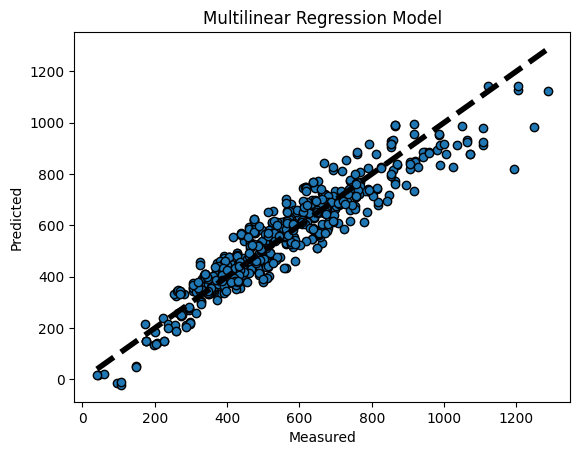

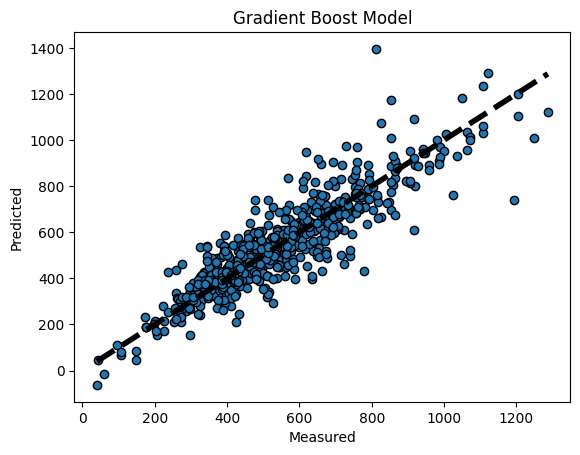

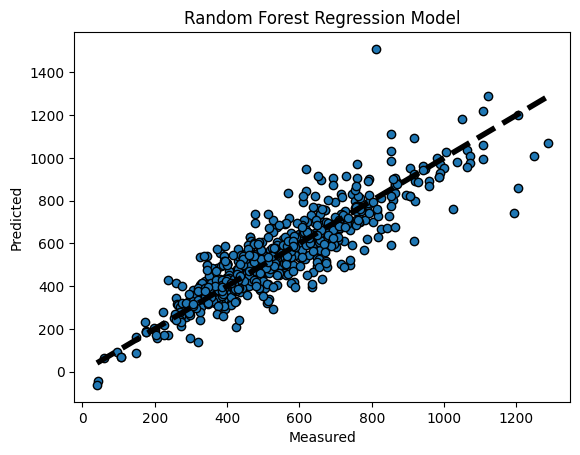

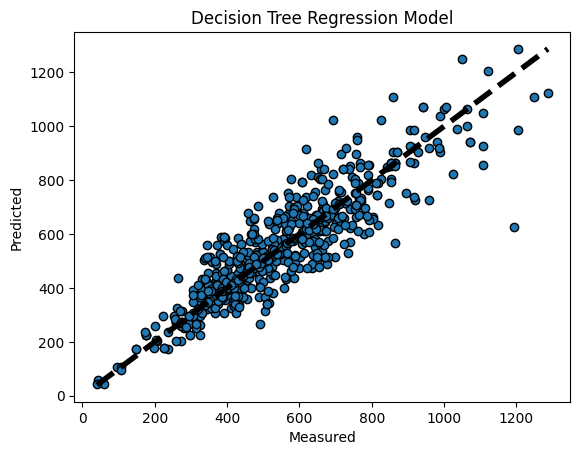

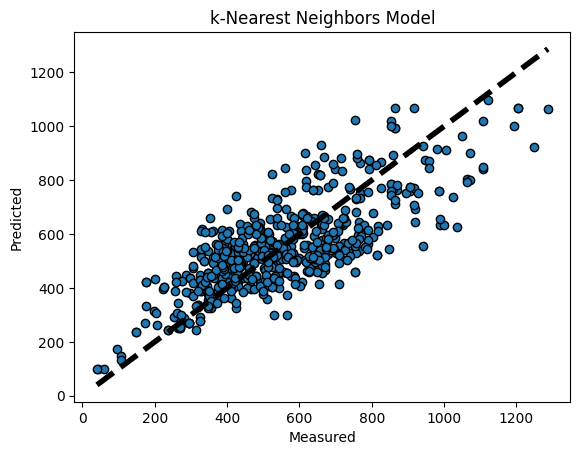

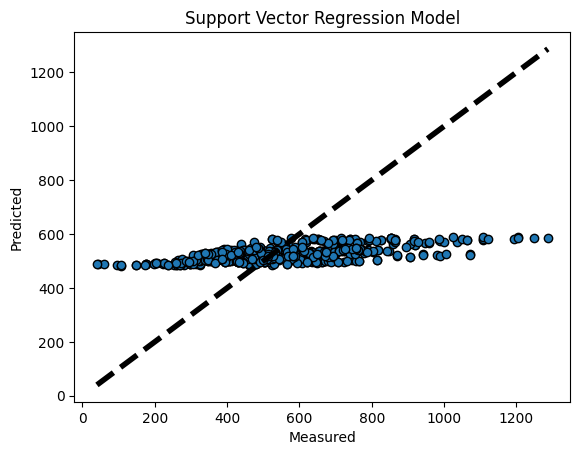

In [67]:
mlr_predicted = cross_val_predict(mlr, x_train, y_train, cv=10)
fig, ax = plt.subplots()
ax.set_title('Multilinear Regression Model')
ax.scatter(y_train, mlr_predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

gbr_predicted = cross_val_predict(gbr, x_train, y_train, cv=10)
fig, ax = plt.subplots()
ax.set_title('Gradient Boost Model')
ax.scatter(y_train, gbr_predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

rfg_predicted = cross_val_predict(rfg, x_train, y_train, cv=10)
fig, ax = plt.subplots()
ax.set_title('Random Forest Regression Model')
ax.scatter(y_train, rfg_predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

dtr_predicted = cross_val_predict(dtr, x_train, y_train, cv=10)
fig, ax = plt.subplots()
ax.set_title('Decision Tree Regression Model')
ax.scatter(y_train, dtr_predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

knn_predicted = cross_val_predict(knn, x_train, y_train, cv=10)
fig, ax = plt.subplots()
ax.set_title('k-Nearest Neighbors Model')
ax.scatter(y_train, knn_predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

svr_predicted = cross_val_predict(svr, x_train, y_train, cv=10)
fig, ax = plt.subplots()
ax.set_title('Support Vector Regression Model')
ax.scatter(y_train, svr_predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

### Validation of Model from Test Data

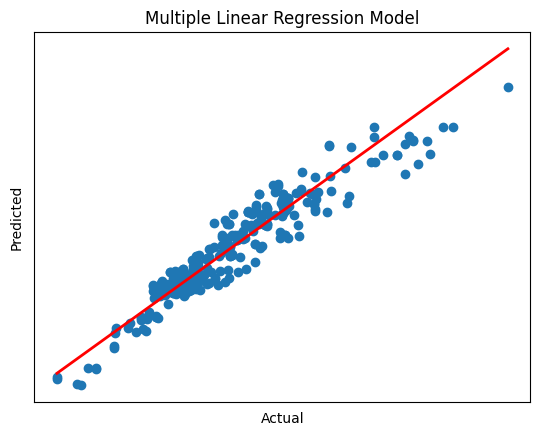

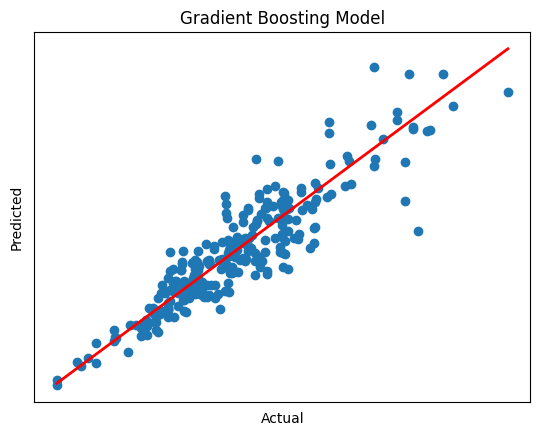

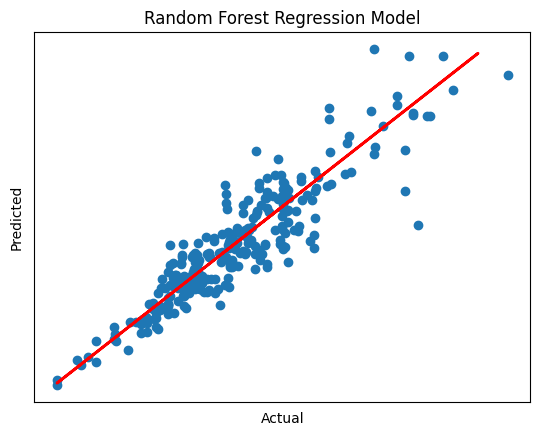

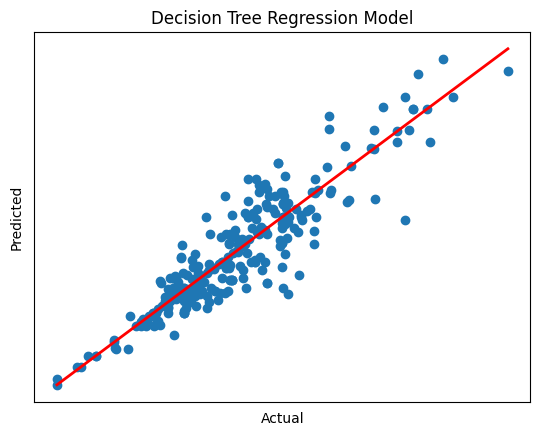

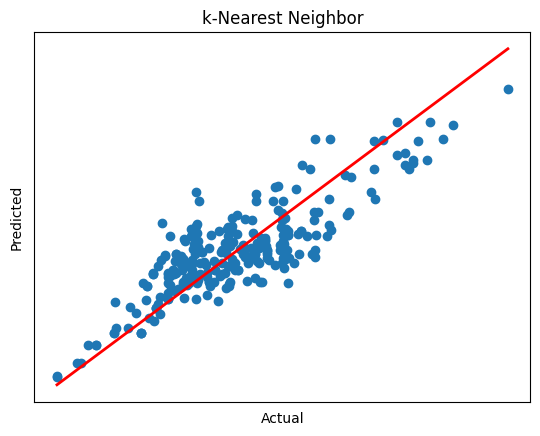

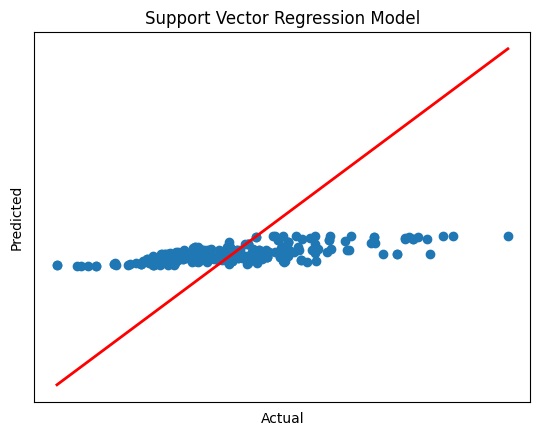

In [68]:
plt.title('Multiple Linear Regression Model')
plt.scatter(y_test, mlr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xticks(())
plt.yticks(())
plt.show()

plt.title('Gradient Boosting Model')
plt.scatter(y_test, gbr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xticks(())
plt.yticks(())
plt.show()

plt.title('Random Forest Regression Model')
plt.scatter(y_test, rfg_pred)
plt.plot(y_poly_test, y_poly_test, color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xticks(())
plt.yticks(())
plt.show()

plt.title('Decision Tree Regression Model')
plt.scatter(y_test, dtr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xticks(())
plt.yticks(())
plt.show()

plt.title('k-Nearest Neighbor')
plt.scatter(y_test, knn_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xticks(())
plt.yticks(())
plt.show()

plt.title('Support Vector Regression Model')
plt.scatter(y_test, svr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xticks(())
plt.yticks(())
plt.show()

### Display the Difference between Actual vs Predicted

In [70]:
print('Polynomial Regression')
pr_pred_y_df=pd.DataFrame({ 'Actual Value': y_poly_test, 'Predicted Value': pr_pred, 'Difference': y_poly_test-pr_pred})
display(pr_pred_y_df[0:20])

print('Multiple Linear Regression')
mlr_pred_y_df=pd.DataFrame({ 'Actual Value': y_test, 'Predicted Value': mlr_pred, 'Difference': y_test-mlr_pred})
display(mlr_pred_y_df[0:20])

print('Gradient Boost Regression')
gbr_pred_y_df=pd.DataFrame({ 'Actual Value': y_test, 'Predicted Value': gbr_pred, 'Difference': y_test-gbr_pred})
display(gbr_pred_y_df[0:20])

print('Random Forest Regression')
rfg_pred_y_df=pd.DataFrame({ 'Actual Value': y_test, 'Predicted Value': rfg_pred, 'Difference': y_test-rfg_pred})
display(rfg_pred_y_df[0:20])

print('Decision Tree Regression')
dtr_pred_y_df=pd.DataFrame({ 'Actual Value': y_test, 'Predicted Value': dtr_pred, 'Difference': y_test-dtr_pred})
display(dtr_pred_y_df[0:20])

print('k-Nearest Neighbor')
knn_pred_y_df=pd.DataFrame({ 'Actual Value': y_test, 'Predicted Value': knn_pred, 'Difference': y_test-knn_pred})
display(knn_pred_y_df[0:20])


print('Support Vector Regression')
svr_pred_y_df=pd.DataFrame({ 'Actual Value': y_test, 'Predicted Value': svr_pred, 'Difference': y_test-svr_pred})
display(svr_pred_y_df[0:20])

Polynomial Regression


,Actual Value,Predicted Value,Difference
0,786.6,733.127785,53.472215
1,364.5,359.341471,5.158529
2,620.5,559.720833,60.779167
3,430.0,452.372463,-22.372463
4,589.6,597.015895,-7.415895
5,427.7,496.031431,-68.331431
6,421.6,437.484407,-15.884407
7,657.0,660.284137,-3.284137
8,418.6,397.782673,20.817327
9,501.6,466.603840,34.996160


Multiple Linear Regression


,Actual Value,Predicted Value,Difference
0,561.2,558.986987,2.213013
1,793.0,915.260306,-122.260306
2,554.6,586.380298,-31.780298
3,320.0,352.046472,-32.046472
4,661.2,650.773290,10.426710
5,40.0,18.038438,21.961562
6,519.4,528.639918,-9.239918
7,107.8,-4.210354,112.010354
8,455.8,382.519570,73.280430
9,360.8,349.759432,11.040568


Gradient Boost Regression


,Actual Value,Predicted Value,Difference
0,561.2,494.206409,66.993591
1,793.0,972.030032,-179.030032
2,554.6,639.781396,-85.181396
3,320.0,358.752866,-38.752866
4,661.2,594.942673,66.257327
5,40.0,34.150746,5.849254
6,519.4,548.095759,-28.695759
7,107.8,103.867897,3.932103
8,455.8,405.931870,49.868130
9,360.8,389.955401,-29.155401


Random Forest Regression


,Actual Value,Predicted Value,Difference
0,561.2,494.206409,66.993591
1,793.0,972.030032,-179.030032
2,554.6,639.781396,-85.181396
3,320.0,358.752866,-38.752866
4,661.2,594.942673,66.257327
5,40.0,34.150746,5.849254
6,519.4,548.095759,-28.695759
7,107.8,103.867897,3.932103
8,455.8,405.931870,49.868130
9,360.8,389.955401,-29.155401


Decision Tree Regression


,Actual Value,Predicted Value,Difference
0,561.2,561.2,0.0
1,793.0,1037.0,-244.0
2,554.6,554.6,0.0
3,320.0,320.0,0.0
4,661.2,565.5,95.7
5,40.0,40.0,0.0
6,519.4,485.0,34.4
7,107.8,107.8,0.0
8,455.8,369.8,86.0
9,360.8,434.6,-73.8


k-Nearest Neighbor


,Actual Value,Predicted Value,Difference
0,561.2,513.76,47.44
1,793.0,634.40,158.60
2,554.6,524.52,30.08
3,320.0,339.36,-19.36
4,661.2,492.42,168.78
5,40.0,71.72,-31.72
6,519.4,554.68,-35.28
7,107.8,121.36,-13.56
8,455.8,440.32,15.48
9,360.8,459.52,-98.72


Support Vector Regression


,Actual Value,Predicted Value,Difference
0,561.2,561.099858,0.100142
1,793.0,577.756920,215.243080
2,554.6,512.617455,41.982545
3,320.0,500.741750,-180.741750
4,661.2,534.551045,126.648955
5,40.0,484.802474,-444.802474
6,519.4,549.709721,-30.309721
7,107.8,481.861278,-374.061278
8,455.8,505.553560,-49.753560
9,360.8,502.294520,-141.494520


## Test Model

In [73]:
columns = ['Model', 'Actual', 'Predicted Value', 'Difference']
input_features = [[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,122,18.3,34.3,88,8540]]
actual = 561.2
def diff(val):
    return actual - val

pr_p = pr.predict(pfr.fit_transform(input_features))[0]
mlr_p = mlr.predict(input_features)[0]
knn_p = knn.predict(input_features)[0]
gbr_p = gbr.predict(input_features)[0]
svr_p = svr.predict(input_features)[0]
rfg_p = rfg.predict(input_features)[0]
dtr_p = dtr.predict(input_features)[0]
data = [
    ['Multiple Linear Regression', actual, mlr_p, diff(mlr_p)], 
    ['Polynomial Regression', actual, pr_p, diff(pr_p)], 
    ['Gradient Boost Regression', actual, gbr_p, diff(gbr_p)], 
    ['Random Forest Regression', actual, rfg_p, diff(rfg_p)],
    ['Decision Tree Regression', actual, dtr_p, diff(dtr_p)],
    ['k-Nearest Neighbor', actual, knn_p, diff(knn_p)], 
    ['Support Vector Regression', actual, svr_p, diff(svr_p)]
]

pd.DataFrame(data, columns=columns)

,Model,Actual,Predicted Value,Difference
0,Multiple Linear Regression,561.2,559.897979,1.302021
1,Polynomial Regression,561.2,512.313303,48.886697
2,Gradient Boost Regression,561.2,547.144216,14.055784
3,Random Forest Regression,561.2,547.144216,14.055784
4,Decision Tree Regression,561.2,561.200000,0.000000
5,k-Nearest Neighbor,561.2,513.760000,47.440000
6,Support Vector Regression,561.2,561.100033,0.099967


### Models Validation Summary

In [74]:
columns = ['Model', 'MSE (near 0)', 'RMSE (0 - 180)', 'MAE (near 0)', 'R2 (0.00 - 1.00)']
def generateData(model_name, y_test, y_predict):
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    rmse = math.sqrt(mse)
    return [model_name, mse, rmse, mae, r2]

data = [
    generateData('Multiple Linear Regression', y_test, mlr_pred), 
    generateData('Polynomial Regression', y_poly_test, pr_pred), 
    generateData('Gradient Boost Regression', y_test, gbr_pred), 
    generateData('Random Forest Regression', y_test, rfg_pred), 
    generateData('Decision Tree Regression', y_test, dtr_pred), 
    generateData('k-Nearest Neighbor', y_test, knn_pred), 
    generateData('Support Vector Regression', y_test, svr_pred)
]

print('Model sorted by best R2 score')
pd.DataFrame(data, columns=columns).sort_values(by=['R2 (0.00 - 1.00)'], ascending=False)

Model sorted by best R2 score


,Model,MSE (near 0),RMSE (0 - 180),MAE (near 0),R2 (0.00 - 1.00)
0,Multiple Linear Regression,4181.766624,64.666580,51.540870,0.899290
1,Polynomial Regression,4544.670453,67.414171,49.966469,0.896190
2,Gradient Boost Regression,7626.376580,87.329128,64.876240,0.816334
3,Random Forest Regression,7646.962834,87.446914,64.981406,0.815838
4,Decision Tree Regression,7924.549481,89.019939,63.297778,0.809153
5,k-Nearest Neighbor,12163.286526,110.287291,90.950741,0.707071
6,Support Vector Regression,34374.711391,185.404184,144.377003,0.172153


## Export Multiple Linear Regression Model 

In [16]:
pickle.dump(mlr, open('model.pkl', 'wb'))